In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import  matplotlib.pyplot as plt

# External Lib
from Verification.mtcnn_pytorch.src import detect_faces
from utils import FaceAlignment

In [6]:
# detect the image with landmark:
original_image = Image.open('./images/face4.jpg')
bounding_boxes, landmarks = detect_faces(original_image)
image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)

In [7]:
# alignment
face_align = FaceAlignment()

In [8]:
# alignment
lnk = landmarks.reshape((-1,5,2), order='F').astype(int)[0] # The first landmark
warp_image = face_align(image, lnk, image_size=224, mode='vggface')

In [9]:
def imshow(img):
    """
    jupyter imshow
    """
    plt.figure(dpi=50)
    plt.axis('off')
    img = img[:,:,::-1] 	# transform image to rgb
    plt.imshow(img)
    plt.show()

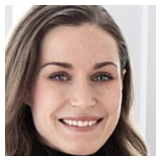

In [10]:
# visualization
imshow(warp_image)

In [11]:
cv2.imwrite("images/{}".format("face4-alignment.jpg"), warp_image)

True